### loading dataset

In [28]:
import pandas as pd

data = pd.read_csv(r'..\3. eda_n_feature engineering\4.1 FEed agePossesion col.csv')
data.head(3)

,property_name,sector,society,price_in_crores,price_per_sqft,...,servantRoom,studyRoom,poojaRoom,storeRoom,otherAdditionalRoom
0,2 BHK Flat in Sector 70 Gurgaon,sector 70,shree vardhman victoria,1.10,8461.0,...,False,False,False,False,False
1,3 Bedroom House for sale in Sector 40 Gurgaon,sector 40,NaN,2.15,23889.0,...,False,True,True,True,False
2,5 Bedroom House for sale in Palam Vihar,palam vihar,ansals palam vihar,9.00,19231.0,...,True,True,True,True,False


In [29]:
pd.set_option('display.max_colwidth', 1000)
data['furnishDetails']

0         ['3 Wardrobe', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']
1          ['4 Wardrobe', '5 Fan', '4 Geyser', '2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']
2                   ['1 Water Purifier', '4 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '1 Stove', '5 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 Wardrobe', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Microwave', 'No Sofa', 'No TV']
3       ['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No

### joining all furnish detail rows into single string for further analysis

In [30]:
pd.set_option('display.max_colwidth', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [31]:
all_furnishDetails = ''
for row in data['furnishDetails'].astype(str).tolist():
    all_furnishDetails += row
len(all_furnishDetails), all_furnishDetails[:1000]

(643005,
 "['3 Wardrobe', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']['4 Wardrobe', '5 Fan', '4 Geyser', '2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']['1 Water Purifier', '4 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '1 Stove', '5 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 Wardrobe', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Microwave', 'No Sofa', 'No TV']['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Wash

In [32]:
'nannan' in all_furnishDetails

True

In [33]:
data['furnishDetails'].str.contains('nannan').value_counts()

furnishDetails
False    2940
Name: count, dtype: int64

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### removing numeric and puctuation chracters from my furnish details

In [35]:
chrs_to_remove = string.punctuation + '0123456789'

In [36]:
translator = str.maketrans('', '', chrs_to_remove)
all_furnishDetails = all_furnishDetails.translate(translator)
all_furnishDetails[:1000]

' Wardrobe  Modular Kitchen  Chimney No AC No Bed No Curtains No Dining Table No Exhaust Fan No Fan No Geyser No Light No Microwave No Fridge No Sofa No Stove No TV No Washing Machine No Water Purifier Wardrobe  Fan  Geyser  Light No AC No Bed No Chimney No Curtains No Dining Table No Exhaust Fan No Modular Kitchen No Microwave No Fridge No Sofa No Stove No TV No Washing Machine No Water Purifier Water Purifier  Fan  Fridge  Exhaust Fan  Geyser  Stove  Light  AC  Modular Kitchen  Chimney  Curtains  Wardrobe  Washing Machine No Bed No Dining Table No Microwave No Sofa No TV Modular Kitchen No AC No Bed No Chimney No Curtains No Dining Table No Exhaust Fan No Fan No Geyser No Light No Microwave No Fridge No Sofa No Stove No TV No Wardrobe No Washing Machine No Water Purifier Wardrobe  Fridge  Fan  Exhaust Fan  Microwave  Stove  Light  Chimney  Modular Kitchen No AC No Bed No Curtains No Dining Table No Geyser No Sofa No TV No Washing Machine No Water Purifiernannan Fan  Light  AC No Bed 

In [37]:
all_furnishDetails = all_furnishDetails.lower().strip()
all_furnishDetails[:1000]

'wardrobe  modular kitchen  chimney no ac no bed no curtains no dining table no exhaust fan no fan no geyser no light no microwave no fridge no sofa no stove no tv no washing machine no water purifier wardrobe  fan  geyser  light no ac no bed no chimney no curtains no dining table no exhaust fan no modular kitchen no microwave no fridge no sofa no stove no tv no washing machine no water purifier water purifier  fan  fridge  exhaust fan  geyser  stove  light  ac  modular kitchen  chimney  curtains  wardrobe  washing machine no bed no dining table no microwave no sofa no tv modular kitchen no ac no bed no chimney no curtains no dining table no exhaust fan no fan no geyser no light no microwave no fridge no sofa no stove no tv no wardrobe no washing machine no water purifier wardrobe  fridge  fan  exhaust fan  microwave  stove  light  chimney  modular kitchen no ac no bed no curtains no dining table no geyser no sofa no tv no washing machine no water purifiernannan fan  light  ac no bed n

### using string translator method created some weired `nannan` values in the o/p string, so let's try nltk's regexpTokenizer appraoch

In [38]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(all_furnishDetails)
pd.Series(tokens).value_counts()

no                         30526
fan                         4998
exhaust                     2499
washing                     2499
fridge                      2499
                           ...  
machinenannannannan            1
sofanan                        1
purifiernannannannannan        1
microwavenannannan             1
wardrobenannannannan           1
Name: count, Length: 44, dtype: int64

In [39]:
# still getting same problem, so let's ignore and move ahead

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarvesh.kesharwani\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
all_furnishDetails_lst = nltk.word_tokenize(all_furnishDetails)
pd.Series(all_furnishDetails_lst).value_counts()

no                         30526
fan                         4998
exhaust                     2499
washing                     2499
fridge                      2499
                           ...  
machinenannannannan            1
sofanan                        1
purifiernannannannannan        1
microwavenannannan             1
wardrobenannannannan           1
Name: count, Length: 44, dtype: int64

In [42]:
all_furnishDetails_lst_al = []
for word in all_furnishDetails_lst:
    if not word.isnumeric():
        all_furnishDetails_lst_al.append(word)
all_furnishDetails_lst_al

pd.Series(all_furnishDetails_lst_al).value_counts()

no                         30526
fan                         4998
exhaust                     2499
washing                     2499
fridge                      2499
                           ...  
machinenannannannan            1
sofanan                        1
purifiernannannannannan        1
microwavenannannan             1
wardrobenannannannan           1
Name: count, Length: 44, dtype: int64

In [43]:
all_furnishDetails_lst_al = pd.Series(all_furnishDetails_lst_al)
all_furnishDetails_lst_al.value_counts()

no                         30526
fan                         4998
exhaust                     2499
washing                     2499
fridge                      2499
                           ...  
machinenannannannan            1
sofanan                        1
purifiernannannannannan        1
microwavenannannan             1
wardrobenannannannan           1
Name: count, Length: 44, dtype: int64

In [44]:
all_furnishDetails_lst_al.apply(lambda row: row.replace('nan', '')).str.strip().value_counts()

no          30526
fan          4998
geyser       2499
water        2499
machine      2499
            ...  
bed          2499
ac           2499
chimney      2499
kitchen      2499
purifier     2499
Name: count, Length: 23, dtype: int64

In [45]:
all_furnishDetails_lst_al = all_furnishDetails_lst_al.apply(lambda row: row.replace('nan', '')).str.strip()
all_furnishDetails_lst_al.value_counts()

no          30526
fan          4998
geyser       2499
water        2499
machine      2499
            ...  
bed          2499
ac           2499
chimney      2499
kitchen      2499
purifier     2499
Name: count, Length: 23, dtype: int64

In [46]:
len(all_furnishDetails_lst_al.unique()), all_furnishDetails_lst_al.unique()

(23,
 array(['wardrobe', 'modular', 'kitchen', 'chimney', 'no', 'ac', 'bed',
        'curtains', 'dining', 'table', 'exhaust', 'fan', 'geyser', 'light',
        'microwave', 'fridge', 'sofa', 'stove', 'tv', 'washing', 'machine',
        'water', 'purifier'], dtype=object))

### creating luxury item mapper

In [61]:
data['furnishDetails']

0         ['3 wardrobe', '1 modular kitchen', '1 chimney', 'no ac', 'no bed', 'no curtains', 'no dining table', 'no exhaust fan', 'no fan', 'no geyser', 'no light', 'no microwave', 'no fridge', 'no sofa', 'no stove', 'no tv', 'no washing machine', 'no water purifier']
1          ['4 wardrobe', '5 fan', '4 geyser', '2 light', 'no ac', 'no bed', 'no chimney', 'no curtains', 'no dining table', 'no exhaust fan', 'no modular kitchen', 'no microwave', 'no fridge', 'no sofa', 'no stove', 'no tv', 'no washing machine', 'no water purifier']
2                   ['1 water purifier', '4 fan', '1 fridge', '1 exhaust fan', '5 geyser', '1 stove', '5 light', '5 ac', '1 modular kitchen', '1 chimney', '1 curtains', '5 wardrobe', '1 washing machine', 'no bed', 'no dining table', 'no microwave', 'no sofa', 'no tv']
3       ['1 modular kitchen', 'no ac', 'no bed', 'no chimney', 'no curtains', 'no dining table', 'no exhaust fan', 'no fan', 'no geyser', 'no light', 'no microwave', 'no fridge', 'no sofa', 'no

In [62]:
data['furnishDetails'] = data['furnishDetails'].str.lower().str.strip()

In [63]:
txt1 = '1 exhaust fan'
sg = re.findall(r'\d*([\w\s]*)', txt1)
sg

[' exhaust fan', '']

In [64]:
import re
all_items = []
def temp(row):
    # print(row[1:-1])
    for r in row[1:-1].split(','):
        item = r.strip()[1:-1]
        item = item.replace('no', '')
        sg = re.findall(r'\d*([\w\s]*)', item)
        if len(sg)>0:
            item = sg[0]
        all_items.append(item.strip())
    return row

pd.set_option('display.max_rows', None)
tmp1 = data['furnishDetails'].astype(str).apply(temp)
x=pd.Series(all_items).value_counts()
x[x>1000]

wardrobe           2499
light              2499
water purifier     2499
washing machine    2499
tv                 2499
stove              2499
sofa               2499
fridge             2499
microwave          2499
geyser             2499
modular kitchen    2499
fan                2499
exhaust fan        2499
dining table       2499
curtains           2499
bed                2499
ac                 2499
chimney            2499
                   1475
Name: count, dtype: int64

In [65]:
# wardrobe
# light
# water purifier
# washing machine
# tv
# stove
# sofa
# fridge
# microwave
# geyser
# modular kitchen
# fan
# exhaust fan
# dining table
# curtains
# bed
# ac
# chimney

# total 18 unique items

In [66]:
luxury_item_value_dict = {
    "wardrobe": 8,
    "light": 6,
    "water purifier": 5,
    "washing machine": 7,
    "tv": 9,
    "stove": 8,
    "sofa": 9,
    "fridge": 8,
    "microwave": 6,
    "geyser": 5,
    "modular kitchen": 10,
    "fan": 4,
    "exhaust fan": 4,
    "dining table": 9,
    "curtains": 7,
    "bed": 10,
    "ac": 7,
    "chimney": 6
}

### creating luxury_value col

In [67]:
pd.set_option('display.max_colwidth', 1000)
data['furnishDetails'].astype(str).str.lower().str.strip().str.split(',')[0]

["['3 wardrobe'",
 " '1 modular kitchen'",
 " '1 chimney'",
 " 'no ac'",
 " 'no bed'",
 " 'no curtains'",
 " 'no dining table'",
 " 'no exhaust fan'",
 " 'no fan'",
 " 'no geyser'",
 " 'no light'",
 " 'no microwave'",
 " 'no fridge'",
 " 'no sofa'",
 " 'no stove'",
 " 'no tv'",
 " 'no washing machine'",
 " 'no water purifier']"]

In [68]:
import re
capture_grp = re.search(r'(\d+)', '42sarvesh123')
print(capture_grp.group())

42


In [69]:
def calc_luxary_value(row):
    items = row.split(',')
    items_present = []
    for item in items:
        # check if item is present in property or not present
        if 'no' not in item:
            items_present.append(item)
    # now for every present item in property calc the luxury value
    for item in items_present:
        # check the count of each item
        capture_grp = re.findall(r'(\d+)', item.strip())
        if capture_grp:
            item_count = int(capture_grp[0])
        else:
            item_count = 0
        # get the luxury value of each item, multiply it with count and get the total luxury_value_of_property
        property_luxury_value=0
        for _, (key, value) in enumerate(luxury_item_value_dict.items()):
            if str(key) in row:
                property_luxury_value += item_count * int(value)
    return property_luxury_value

In [70]:
data['luxary_value'] = data['furnishDetails'].astype(str).apply(calc_luxary_value)
data['luxary_value'].value_counts()

luxary_value
128     1805
0       1475
512      152
384      135
256      104
640       92
768       77
896       26
1280      21
1024      19
1536      12
1152      11
3840       6
1408       6
2560       6
1920       4
2304       3
2048       3
3072       2
2176       2
1664       2
1792       2
2816       1
2688       1
6528       1
6144       1
6656       1
7936       1
2432       1
4096       1
3584       1
Name: count, dtype: int64

### analyzing the values in this luxary_value col

<Axes: >

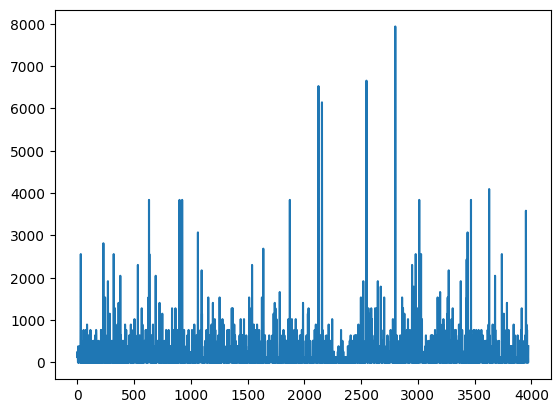

In [71]:
data['luxary_value'].plot()

<Axes: >

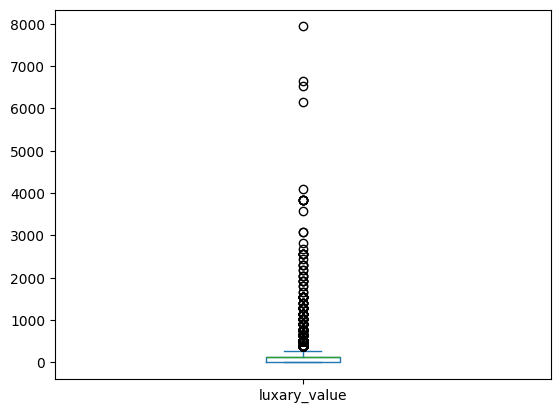

In [72]:
data['luxary_value'].plot(kind='box')

<Axes: >

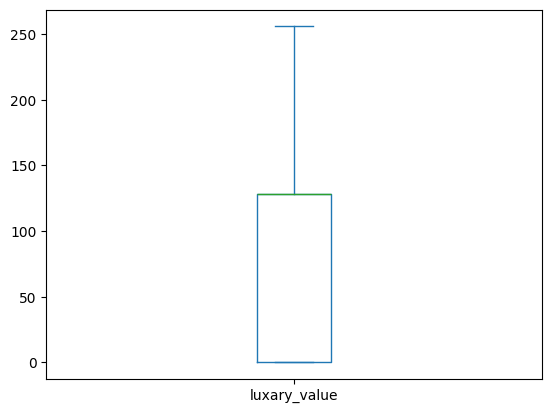

In [73]:
data[data['luxary_value']<300]['luxary_value'].plot(kind='box')

<Axes: >

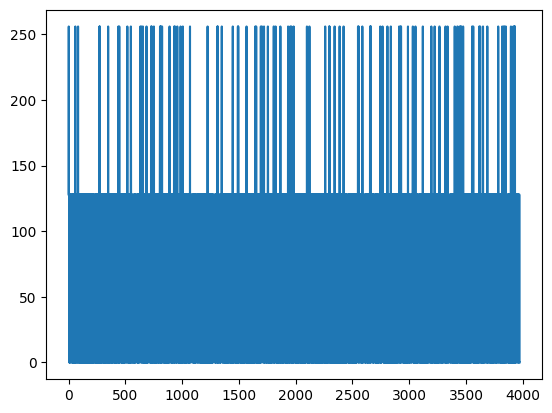

In [74]:
data[data['luxary_value']<300]['luxary_value'].plot()

In [75]:
data['luxary_value'].describe()

count    3974.000000
mean      184.688475
std       396.113504
min         0.000000
25%         0.000000
50%       128.000000
75%       128.000000
max      7936.000000
Name: luxary_value, dtype: float64

### creating onehot columns for all the items

In [76]:
items_ = ['wardrobe', 'light', 'water purifier', 'washing machine', 'tv', 'stove', 'sofa', 'fridge', 'microwave', 'geyser', 'modular kitchen', 'fan', 'exhaust fan', 'dining table', 'curtains', 'bed', 'ac', 'chimney']

In [77]:
data['furnishDetails'].isna().sum(), data.shape[0]

(1034, 3974)

In [78]:
data['furnishDetails'][0]

"['3 wardrobe', '1 modular kitchen', '1 chimney', 'no ac', 'no bed', 'no curtains', 'no dining table', 'no exhaust fan', 'no fan', 'no geyser', 'no light', 'no microwave', 'no fridge', 'no sofa', 'no stove', 'no tv', 'no washing machine', 'no water purifier']"

In [94]:
tmp_str = 'sarvesh'
re.findall(r'\d+', tmp_str)

[]

In [103]:
def get_furnishing_item_count(row, item_to_count):
    items = str(row).split(',')
    items_present = []
    for item in items:
        # check if item is present in property or not present
        if 'no' not in item:
            items_present.append(item.strip())
    # now get the count of each item
    for item in items_present:
        if item_to_count in item:
            capture_grps = re.findall(r'(\d+)', item.strip())
            if capture_grps:
                return int(capture_grps[0])
            else:
                return 0
    # when all the items in a proeprty are 0s
    else:
        return 0


In [115]:
df = pd.DataFrame()
for _, (key, value) in enumerate(luxury_item_value_dict.items()):
    df[key+'_available'] = data['furnishDetails'].astype(str).apply(lambda row: get_furnishing_item_count(row, key))

In [116]:
pd.set_option('display.max_columns', None)
df.head()

,wardrobe_available,light_available,water purifier_available,washing machine_available,tv_available,stove_available,sofa_available,fridge_available,microwave_available,geyser_available,modular kitchen_available,fan_available,exhaust fan_available,dining table_available,curtains_available,bed_available,ac_available,chimney_available
0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,4,2,0,0,0,0,0,0,0,4,0,5,0,0,0,0,0,0
2,5,5,1,1,0,1,0,1,0,5,1,4,1,0,1,0,5,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,6,24,0,0,0,1,0,1,1,0,1,8,1,0,0,0,0,1


In [117]:
df.shape[1]

18

In [118]:
from sklearn.cluster import  KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df


array([[ 0.61508342, -0.48665138, -0.33081123, ..., -0.12245821,
        -0.5269571 ,  1.05592372],
       [ 0.99893102, -0.29975995, -0.33081123, ..., -0.12245821,
        -0.5269571 , -0.5275634 ],
       [ 1.38277863, -0.01942279,  3.022872  , ..., -0.12245821,
         1.38130562,  1.05592372],
       ...,
       [-0.53645938, -0.48665138, -0.33081123, ..., -0.12245821,
        -0.5269571 , -0.5275634 ],
       [-0.53645938, -0.48665138, -0.33081123, ..., -0.12245821,
        -0.5269571 , -0.5275634 ],
       [ 0.61508342,  0.9150344 ,  3.022872  , ..., -0.12245821,
        -0.5269571 , -0.5275634 ]])

In [119]:
wcss_reduced =  []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss_reduced.append(kmeans.inertia_)

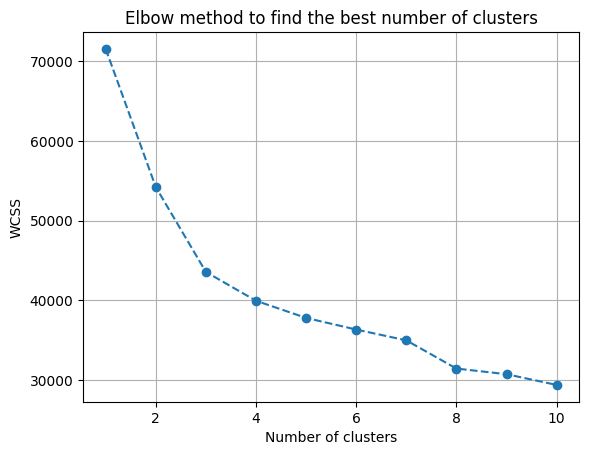

In [123]:
import matplotlib.pyplot as plt 

plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow method to find the best number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### classifying each property by predicting with the kmeans model trained on 3 clusters 

In [128]:
noOfClusters = 3

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [135]:
df_ = pd.DataFrame(scaled_df)
df_['luxury_class'] = kmeans.predict(scaled_df)
df_['luxury_class'].head(3)

0    0
1    0
2    1
Name: luxury_class, dtype: int32

In [134]:
df_.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,luxury_class
0,0.615083,-0.486651,-0.330811,-0.217180,-0.116227,-0.378508,-0.206811,-0.235608,-0.240881,-0.505263,1.239377,-0.641897,-0.692476,-0.195988,-0.222256,-0.122458,-0.526957,1.055924,0
1,0.998931,-0.299760,-0.330811,-0.217180,-0.116227,-0.378508,-0.206811,-0.235608,-0.240881,1.278757,-0.806857,0.716843,-0.692476,-0.195988,-0.222256,-0.122458,-0.526957,-0.527563,0
2,1.382779,-0.019423,3.022872,4.604467,-0.116227,2.641954,-0.206811,4.244332,-0.240881,1.724762,1.239377,0.445095,1.444093,-0.195988,0.537852,-0.122458,1.381306,1.055924,1


In [139]:
df_.shape[0]

3974

In [140]:
data.shape[0]

3974

In [146]:
data['luxury_class'] = df_['luxury_class']

pd.set_option('display.max_colwidth', 50)
data.head(3)

,property_name,sector,society,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_type,noOfFloor,SuperBuiltupArea_sqft,BuiltupArea_sqft,CarpetArea_sqft,servantRoom,studyRoom,poojaRoom,storeRoom,otherAdditionalRoom,luxary_value,luxury_class
0,2 BHK Flat in Sector 70 Gurgaon,sector 70,shree vardhman victoria,1.10,8461.0,2.0,2.0,2,"Sector 70 Gurgaon, Gurgaon, Haryana",8.0,north-east,Very Recent Construction,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",Square yards rera reg.\r\nHrera 660/2017/307\r...,"['3 wardrobe', '1 modular kitchen', '1 chimney...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of...",flat,1.0,NaN,NaN,1299.957411,False,False,False,False,False,128,0
1,3 Bedroom House for sale in Sector 40 Gurgaon,sector 40,NaN,2.15,23889.0,3.0,3.0,3,"Sector 40 Gurgaon, Gurgaon, Haryana",0.0,NaN,Recent Construction,"['Huda city centre metro station', 'Axis bank ...",Its just behind ryan international school and ...,"['4 wardrobe', '5 fan', '4 geyser', '2 light',...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5...",house,3.0,NaN,900.0,NaN,False,True,True,True,False,256,0
2,5 Bedroom House for sale in Palam Vihar,palam vihar,ansals palam vihar,9.00,19231.0,5.0,5.0,2,"J-Block, Palam Vihar, Gurgaon, Haryana",0.0,north,Old Construction,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",North facing plot aviable on sale in palam vih...,"['1 water purifier', '4 fan', '1 fridge', '1 e...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Safety4 out of 5', ...",house,2.0,NaN,4680.0,NaN,True,True,True,True,False,128,1


In [147]:
data.drop(columns=['luxary_value', 'furnishDetails'], axis=1, inplace=True)

In [148]:
data.head(3)

,property_name,sector,society,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,features,rating,property_type,noOfFloor,SuperBuiltupArea_sqft,BuiltupArea_sqft,CarpetArea_sqft,servantRoom,studyRoom,poojaRoom,storeRoom,otherAdditionalRoom,luxury_class
0,2 BHK Flat in Sector 70 Gurgaon,sector 70,shree vardhman victoria,1.10,8461.0,2.0,2.0,2,"Sector 70 Gurgaon, Gurgaon, Haryana",8.0,north-east,Very Recent Construction,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",Square yards rera reg.\r\nHrera 660/2017/307\r...,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of...",flat,1.0,NaN,NaN,1299.957411,False,False,False,False,False,0
1,3 Bedroom House for sale in Sector 40 Gurgaon,sector 40,NaN,2.15,23889.0,3.0,3.0,3,"Sector 40 Gurgaon, Gurgaon, Haryana",0.0,NaN,Recent Construction,"['Huda city centre metro station', 'Axis bank ...",Its just behind ryan international school and ...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5...",house,3.0,NaN,900.0,NaN,False,True,True,True,False,0
2,5 Bedroom House for sale in Palam Vihar,palam vihar,ansals palam vihar,9.00,19231.0,5.0,5.0,2,"J-Block, Palam Vihar, Gurgaon, Haryana",0.0,north,Old Construction,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",North facing plot aviable on sale in palam vih...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Safety4 out of 5', ...",house,2.0,NaN,4680.0,NaN,True,True,True,True,False,1


In [ ]:
data.to_csv(r'..\3. eda_n_feature engineering\5.1 FEed furnishDetails col.csv', index=False)